In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('csv_version.csv')
data.head()

,ChildID,PregnancyID,MotherID,deminfeth3gpcomb,Age31March20,Gender,IMD2019_decile,hhseholdsize,c19c2_chfl_acttrvl_mor,c19c2_chfl_acttrvl_aft,c19c2_chsch_tvlnow,c19c2_chsch_tvlbfe,c19c2_chsch_vclcnt,c19c2_chsch_10wlk,Y3
0,13373,10036P1,37,White British,12,Female,1,5.0,None,None,Car/Van,Car/Van,2,Quite happy,1
1,12790,10041P1,42,Other,12,Female,2,4.0,4 times last week,2-3 times last week,Walk,Walk,3,NaN,1
2,13634,10071P1,72,White British,12,Female,4,4.0,2-3 times last week,2-3 times last week,Walk,Walk,2,NaN,1
3,13431,10106P1,93,White British,12,Female,1,3.0,1 time last week,2-3 times last week,Walk,Car/Van,2,NaN,0
4,14190,10112P1,99,White British,12,Male,8,4.0,5 times last week,4 times last week,Walk,Walk,2,NaN,1


In [3]:
df=data.iloc[:,3:]
df.head()

,deminfeth3gpcomb,Age31March20,Gender,IMD2019_decile,hhseholdsize,c19c2_chfl_acttrvl_mor,c19c2_chfl_acttrvl_aft,c19c2_chsch_tvlnow,c19c2_chsch_tvlbfe,c19c2_chsch_vclcnt,c19c2_chsch_10wlk,Y3
0,White British,12,Female,1,5.0,None,None,Car/Van,Car/Van,2,Quite happy,1
1,Other,12,Female,2,4.0,4 times last week,2-3 times last week,Walk,Walk,3,NaN,1
2,White British,12,Female,4,4.0,2-3 times last week,2-3 times last week,Walk,Walk,2,NaN,1
3,White British,12,Female,1,3.0,1 time last week,2-3 times last week,Walk,Car/Van,2,NaN,0
4,White British,12,Male,8,4.0,5 times last week,4 times last week,Walk,Walk,2,NaN,1


In [4]:
## discrete label by mapping

morning_travel_mapping={'None':1,
                       '1 time last week':2,
                       '2-3 times last week':3,
                       '4 times last week':4,
                       '5 times last week':5}

afternoon_travel_mapping={'None':1,
                       '1 time last week':2,
                       '2-3 times last week':3,
                       '4 times last week':4,
                       '5 times last week':5}

vclcnt_mapping={'None':1,
               '1':2,
               '2':3,
               '4':4,
               'More than 3':5}

walk_unwillingness_mapping={'Very happy':1,
                           'Quite happy':2,
                           'Quite unhappy':3,
                           'Very unhappy':4}

df1=df
df1['c19c2_chfl_acttrvl_mor']=df1['c19c2_chfl_acttrvl_mor'].map(morning_travel_mapping)
df1['c19c2_chfl_acttrvl_aft']=df1['c19c2_chfl_acttrvl_aft'].map(afternoon_travel_mapping)
df1['c19c2_chsch_vclcnt']=df1['c19c2_chsch_vclcnt'].map(vclcnt_mapping)
df1['c19c2_chsch_10wlk']=df1['c19c2_chsch_10wlk'].map(walk_unwillingness_mapping)

In [5]:
df1.columns = ['ethnicity','age','gender','IMD2019_decile','household_size','mor_travel','aft_travel','mode_now','mode_before',
              '#car','unwill_walk','Y3']

In [6]:
df2=df1

dummy=pd.get_dummies(df2[['ethnicity','gender']])

In [7]:
df3=df2.drop(['ethnicity','gender'], axis=1)
df3=df3.join(dummy)
df3.head(9)

,age,IMD2019_decile,household_size,mor_travel,aft_travel,mode_now,mode_before,#car,unwill_walk,Y3,ethnicity_Other,ethnicity_Pakistani,ethnicity_White British,gender_Female,gender_Male
0,12,1,5.0,1.0,1.0,Car/Van,Car/Van,3.0,2.0,1,0,0,1,1,0
1,12,2,4.0,4.0,3.0,Walk,Walk,NaN,NaN,1,1,0,0,1,0
2,12,4,4.0,3.0,3.0,Walk,Walk,3.0,NaN,1,0,0,1,1,0
3,12,1,3.0,2.0,3.0,Walk,Car/Van,3.0,NaN,0,0,0,1,1,0
4,12,8,4.0,5.0,4.0,Walk,Walk,3.0,NaN,1,0,0,1,0,1
5,10,8,4.0,1.0,2.0,Walk,Car/Van,3.0,NaN,0,0,0,1,0,1
6,12,6,NaN,5.0,5.0,Walk,Walk,2.0,NaN,1,0,0,1,0,1
7,9,6,NaN,4.0,4.0,Walk,Walk,2.0,2.0,1,0,0,1,1,0
8,12,2,4.0,1.0,3.0,Car/Van,Car/Van,3.0,1.0,1,1,0,0,1,0


In [8]:
df3.columns

Index(['age', 'IMD2019_decile', 'household_size', 'mor_travel', 'aft_travel',
       'mode_now', 'mode_before', '#car', 'unwill_walk', 'Y3',
       'ethnicity_Other', 'ethnicity_Pakistani', 'ethnicity_White British',
       'gender_Female', 'gender_Male'],
      dtype='object')

In [9]:
data = df3[['age', 'IMD2019_decile', 'household_size', 'mor_travel', 'aft_travel',
       'mode_now', 'mode_before', '#car', 'unwill_walk',
        'ethnicity_Pakistani', 'ethnicity_White British',
       'gender_Female']]

data.head()

,age,IMD2019_decile,household_size,mor_travel,aft_travel,mode_now,mode_before,#car,unwill_walk,ethnicity_Pakistani,ethnicity_White British,gender_Female
0,12,1,5.0,1.0,1.0,Car/Van,Car/Van,3.0,2.0,0,1,1
1,12,2,4.0,4.0,3.0,Walk,Walk,NaN,NaN,0,0,1
2,12,4,4.0,3.0,3.0,Walk,Walk,3.0,NaN,0,1,1
3,12,1,3.0,2.0,3.0,Walk,Car/Van,3.0,NaN,0,1,1
4,12,8,4.0,5.0,4.0,Walk,Walk,3.0,NaN,0,1,0


In [10]:
data = data.drop(['unwill_walk'],axis=1)

In [11]:
data = data.dropna(axis=0,how='any')
data.shape

(522, 11)

In [12]:
data['mode_now'].value_counts()

Car/Van       250
Walk          199
School Bus     48
Other bus      12
Train           6
Bicycle         6
Taxi            1
Name: mode_now, dtype: int64

combine the labels, let bus + train + taxi together as public transport(school bus);  
walk + bicycle together as active mode(walk);


In [22]:
data1 = data.replace('Bicycle','Walk')
data1 = data1.replace('Other bus','School Bus')
data1 = data1.replace('Train','School Bus')
data1 = data1.replace('Taxi','School Bus')
data1['mode_now'].value_counts()

Car/Van       250
Walk          205
School Bus     67
Name: mode_now, dtype: int64

In [23]:
data1['mode_before'].value_counts()

Car/Van       261
Walk          213
School Bus     48
Name: mode_before, dtype: int64

In [27]:

X = data1[['age', 'IMD2019_decile', 'household_size', 'mor_travel', 'aft_travel',
         '#car',  'ethnicity_Pakistani', 'ethnicity_White British','gender_Female']]
Y_before = data1['mode_before']
Y_now = data1['mode_now']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,Y_before,stratify = Y_before)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,Y_now,stratify = Y_now)

<AxesSubplot:>

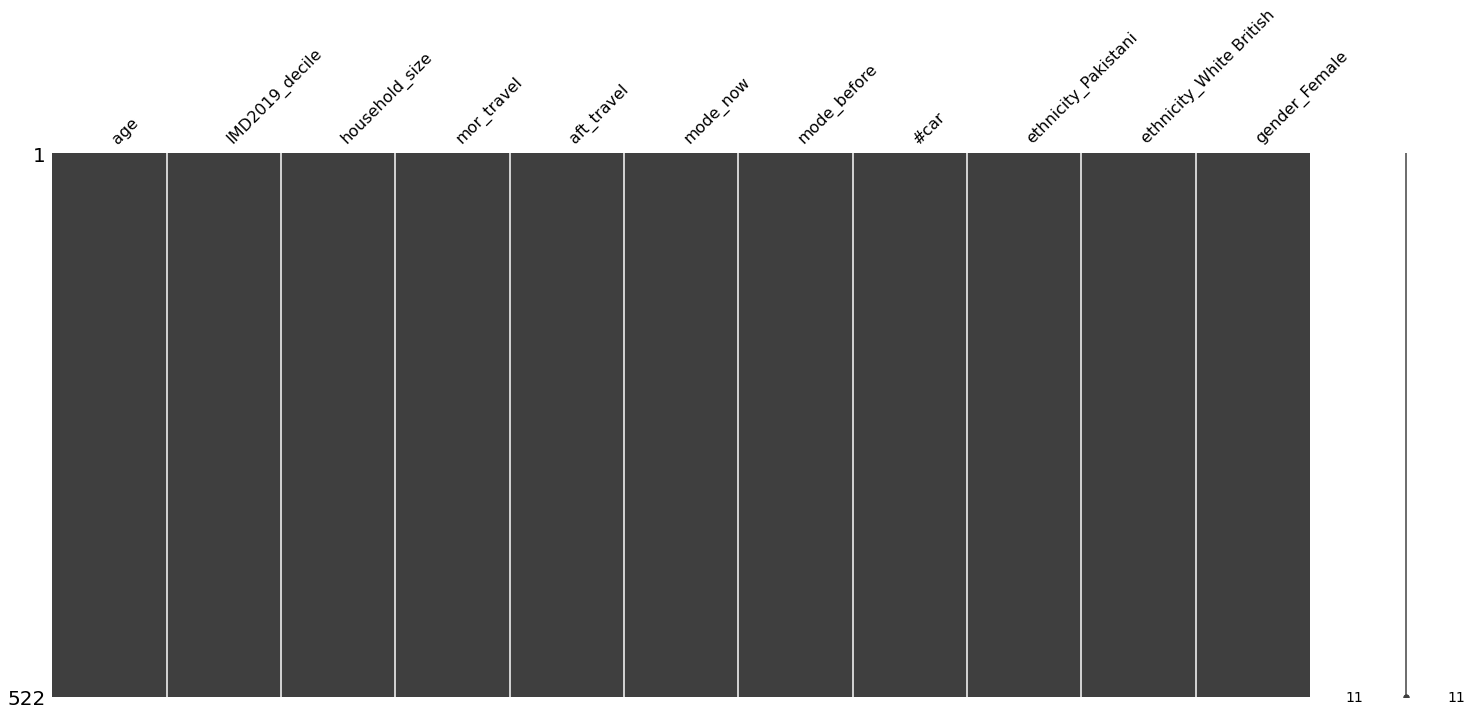

In [25]:
import missingno as msno
msno.matrix(data1)

In [28]:
## normalization
from sklearn.preprocessing import MinMaxScaler
# minmax: [0,1]
X_minmax_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X),columns=X.columns)

In [29]:
X_minmax_train1, X_minmax_test1, y_minmax_train1, y_minmax_test1 = train_test_split(X_minmax_scaled,Y_before,stratify = Y_before)
X_minmax_train2, X_minmax_test2, y_minmax_train2, y_minmax_test2 = train_test_split(X_minmax_scaled,Y_now,stratify = Y_now)

In [30]:
# logistic
from sklearn.linear_model import LogisticRegressionCV
clf_before1 = LogisticRegressionCV(cv=5, penalty='l1',solver='liblinear').fit(X_train1,y_train1)
clf_before2 = LogisticRegressionCV(cv=5, penalty='l2').fit(X_train1, y_train1)

clf_now1 = LogisticRegressionCV(cv=5, penalty='l1',solver='liblinear').fit(X_train2,y_train2)
clf_now2 = LogisticRegressionCV(cv=5, penalty='l2').fit(X_train2,y_train2)

clf_b1_mm = LogisticRegressionCV(cv=5, penalty='l1',solver='liblinear').fit(X_minmax_train1, y_minmax_train1)
clf_b2_mm = LogisticRegressionCV(cv=5, penalty='l2').fit(X_minmax_train1,y_minmax_train1)

clf_n1_mm = LogisticRegressionCV(cv=5, penalty='l1',solver='liblinear').fit(X_minmax_train2, y_minmax_train2)
clf_n2_mm = LogisticRegressionCV(cv=5, penalty='l2').fit(X_minmax_train2,y_minmax_train2)



for i in [clf_before1,clf_before2]:
    print('model is', i)
    pred = i.predict(X_test1)
    print(classification_report(y_test1,pred))
    print(confusion_matrix(y_test1, pred))
    

for i in [clf_now1,clf_now2]:
    print('model is', i)
    pred = i.predict(X_test2)
    print(classification_report(y_test2,pred))
    print(confusion_matrix(y_test2, pred))

for i in [clf_b1_mm,clf_b2_mm]:
    print('model is', i)
    pred = i.predict(X_minmax_test1)
    print(classification_report(y_minmax_test1,pred))
    print(confusion_matrix(y_minmax_test1, pred))
    
for i in [clf_n1_mm,clf_n2_mm]:
    print('model is', i)
    pred = i.predict(X_minmax_test2)
    print(classification_report(y_minmax_test2,pred))
    print(confusion_matrix(y_minmax_test2, pred)) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

model is LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')
              precision    recall  f1-score   support

     Car/Van       0.70      0.67      0.68        66
  School Bus       0.17      0.17      0.17        12
        Walk       0.70      0.74      0.72        53

    accuracy                           0.65       131
   macro avg       0.52      0.52      0.52       131
weighted avg       0.65      0.65      0.65       131

[[44  8 14]
 [ 7  2  3]
 [12  2 39]]
model is LogisticRegressionCV(cv=5)
              precision    recall  f1-score   support

     Car/Van       0.69      0.77      0.73        66
  School Bus       1.00      0.08      0.15        12
        Walk       0.68      0.72      0.70        53

    accuracy                           0.69       131
   macro avg       0.79      0.52      0.53       131
weighted avg       0.71      0.69      0.66       131

[[51  0 15]
 [ 8  1  3]
 [15  0 38]]
model is LogisticRegressionCV(cv=5, penalty='l1', solver='

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

In [31]:
## SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'C': [0.1,0.01,0.001,0.0001],  
              'gamma': [0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf','poly','sigmoid','linear']} 

election_model_svm = GridSearchCV(SVC(),tuned_parameters,cv=5)
minmax_model_svm_before = election_model_svm.fit(X_minmax_scaled,Y_before)
minmax_model_svm_now = election_model_svm.fit(X_minmax_scaled,Y_now)
ori_model_svm_before = election_model_svm.fit(X,Y_before)
ori_model_svm_now = election_model_svm.fit(X,Y_now)

minmax_predictions1 = minmax_model_svm_before.predict(X_minmax_test1) 
minmax_predictions2 = minmax_model_svm_now.predict(X_minmax_test2) 
ori_pred1 = ori_model_svm_before.predict(X_test1)
ori_pred2 = ori_model_svm_now.predict(X_test2)

print(classification_report(y_minmax_test1, minmax_predictions1))
print(classification_report(y_minmax_test2, minmax_predictions2))
print(classification_report(y_test1, ori_pred1))
print(classification_report(y_test2, ori_pred2))

              precision    recall  f1-score   support

     Car/Van       0.50      1.00      0.67        66
  School Bus       0.00      0.00      0.00        12
        Walk       0.00      0.00      0.00        53

    accuracy                           0.50       131
   macro avg       0.17      0.33      0.22       131
weighted avg       0.25      0.50      0.34       131

              precision    recall  f1-score   support

     Car/Van       0.48      1.00      0.65        63
  School Bus       0.00      0.00      0.00        17
        Walk       0.00      0.00      0.00        51

    accuracy                           0.48       131
   macro avg       0.16      0.33      0.22       131
weighted avg       0.23      0.48      0.31       131

              precision    recall  f1-score   support

     Car/Van       0.68      0.77      0.72        66
  School Bus       0.00      0.00      0.00        12
        Walk       0.68      0.72      0.70        53

    accuracy        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

In [32]:
## esemble learning
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [33]:
# 1 BaggingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
before = model_selection.cross_val_score(model, X, Y_before, cv=kfold)
before_minmax = model_selection.cross_val_score(model, X_minmax_scaled, Y_before, cv=kfold)
now = model_selection.cross_val_score(model, X, Y_now, cv=kfold)
now_minmax = model_selection.cross_val_score(model,  X_minmax_scaled, Y_now, cv=kfold)
print(before.mean())
print(before_minmax.mean())
print(now.mean())
print(now_minmax.mean())

0.5690130624092887
0.5690856313497823
0.6744920174165457
0.6745283018867926


In [35]:
# 2 adaboost
from sklearn.ensemble import AdaBoostClassifier
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits=5)
model1 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
print(model_selection.cross_val_score(model1, X, Y_before, cv=kfold)) 
adaboost1 = model1.fit(X_train1,y_train1)
adaboost_pred1 = adaboost1.predict(X_test1)
print(classification_report(y_test1, adaboost_pred1))
print(confusion_matrix(y_test1, adaboost_pred1))

[0.59047619 0.6        0.54807692 0.66346154 0.75      ]
              precision    recall  f1-score   support

     Car/Van       0.67      0.62      0.65        66
  School Bus       0.22      0.33      0.27        12
        Walk       0.65      0.64      0.65        53

    accuracy                           0.60       131
   macro avg       0.52      0.53      0.52       131
weighted avg       0.62      0.60      0.61       131

[[41 10 15]
 [ 5  4  3]
 [15  4 34]]


In [36]:
adaboost_now = model1.fit(X_train2,y_train2)
adaboost_pred_now1 = adaboost_now.predict(X_test2)
print(classification_report(y_test1, adaboost_pred_now1))
print(confusion_matrix(y_test1, adaboost_pred_now1))

              precision    recall  f1-score   support

     Car/Van       0.48      0.45      0.47        66
  School Bus       0.12      0.08      0.10        12
        Walk       0.40      0.45      0.42        53

    accuracy                           0.42       131
   macro avg       0.33      0.33      0.33       131
weighted avg       0.41      0.42      0.42       131

[[30  6 30]
 [ 5  1  6]
 [28  1 24]]


In [37]:
adaboost_now_mm = model1.fit(X_minmax_train2,y_minmax_train2)
adaboost_pred_now_mm = adaboost_now_mm.predict(X_minmax_test2)
print(classification_report(y_minmax_test1, adaboost_pred_now_mm))
print(confusion_matrix(y_minmax_test1, adaboost_pred_now_mm))

              precision    recall  f1-score   support

     Car/Van       0.45      0.42      0.44        66
  School Bus       0.06      0.08      0.07        12
        Walk       0.31      0.30      0.30        53

    accuracy                           0.34       131
   macro avg       0.27      0.27      0.27       131
weighted avg       0.36      0.34      0.35       131

[[28  8 30]
 [ 5  1  6]
 [29  8 16]]


In [38]:
# 3 ensemble voting
from sklearn.ensemble import VotingClassifier
estimators = []

clf_l1 = LogisticRegressionCV(cv=5, penalty='l1',solver='liblinear')
clf_l2 = LogisticRegressionCV(cv=5, penalty='l2')
estimators.append(('logistic l1', clf_l1))
estimators.append(('logistic l2', clf_l2))
clf_l3 = DecisionTreeClassifier()
estimators.append(('decison tree', clf_l3))
clf_l4 = SVC()
estimators.append(('svm', clf_l4))
clf_l5 = KNeighborsClassifier()
estimators.append(('KNN', clf_l5))
estimators.append(('BNB', GaussianNB()))
estimators.append(('BeNB', BernoulliNB()))
estimators.append(('PNB', MultinomialNB()))          
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble_before = ensemble.fit(X_train1,y_train1)
ensemble_now = ensemble.fit(X_train2,y_train2)

#print(model_selection.cross_val_score(ensemble1, X1, Y1, cv=kfold)) 

ensemble_pred_before = ensemble_before.predict(X_test1)
ensemble_pred_now = ensemble_now.predict(X_test2)
print(classification_report(y_test1, ensemble_pred_before))
print(confusion_matrix(y_test1, ensemble_pred_before))


print(classification_report(y_test2, ensemble_pred_now))
print(confusion_matrix(y_test2, ensemble_pred_now))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

     Car/Van       0.66      0.71      0.69        66
  School Bus       0.00      0.00      0.00        12
        Walk       0.63      0.72      0.67        53

    accuracy                           0.65       131
   macro avg       0.43      0.48      0.45       131
weighted avg       0.59      0.65      0.62       131

[[47  0 19]
 [ 9  0  3]
 [15  0 38]]
              precision    recall  f1-score   support

     Car/Van       0.74      0.81      0.77        63
  School Bus       0.00      0.00      0.00        17
        Walk       0.76      0.92      0.83        51

    accuracy                           0.75       131
   macro avg       0.50      0.58      0.53       131
weighted avg       0.65      0.75      0.70       131

[[51  0 12]
 [14  0  3]
 [ 4  0 47]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [39]:
ensemble_before_mm = ensemble.fit(X_minmax_train1,y_minmax_train1)
ensemble_now_mm = ensemble.fit(X_minmax_train2,y_minmax_train2)

ensemble_pred_before_mm = ensemble_before.predict(X_minmax_test1)
ensemble_pred_now_mm = ensemble_now.predict(X_minmax_test2)

print(classification_report(y_minmax_test1, ensemble_pred_before_mm))
print(confusion_matrix(y_minmax_test1, ensemble_pred_before_mm))


print(classification_report(y_minmax_test2, ensemble_pred_now_mm))
print(confusion_matrix(y_minmax_test2, ensemble_pred_now_mm))


              precision    recall  f1-score   support

     Car/Van       0.71      0.80      0.75        66
  School Bus       0.00      0.00      0.00        12
        Walk       0.71      0.75      0.73        53

    accuracy                           0.71       131
   macro avg       0.47      0.52      0.50       131
weighted avg       0.65      0.71      0.68       131

[[53  0 13]
 [ 9  0  3]
 [13  0 40]]
              precision    recall  f1-score   support

     Car/Van       0.76      0.90      0.83        63
  School Bus       0.00      0.00      0.00        17
        Walk       0.80      0.88      0.84        51

    accuracy                           0.78       131
   macro avg       0.52      0.60      0.56       131
weighted avg       0.68      0.78      0.72       131

[[57  0  6]
 [12  0  5]
 [ 6  0 45]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

In [44]:

mapping={'Walk':1,
        'Car/Van':2,
        'School Bus':3}
Y1=Y_before.map(mapping)

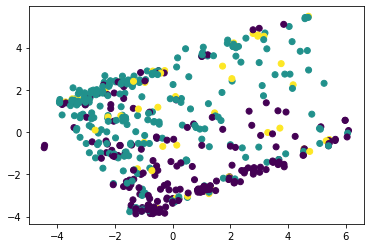

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_pca=pca.transform(X)
X_pca.shape
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y1)

In [ ]:
### assume, delete the bus, only consider  car and active